In [9]:
from google.colab import files
uploaded = files.upload()


Saving county_facts.csv to county_facts (1).csv


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best C value from grid search: 0.01
Best Cross-Validated Accuracy: 0.7985246453033268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Final Model Metrics:
Accuracy: 0.810641627543036
Precision: 0.8058252427184466
Recall: 0.8032258064516129
F1-Score: 0.8045234248788369
ROC-AUC: 0.9010981468771448


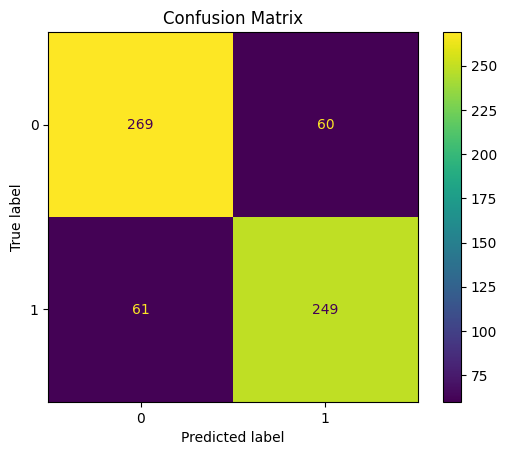

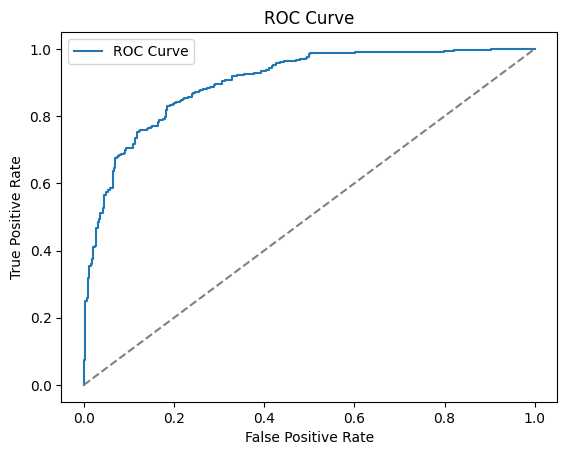


Feature Importance (Top 10):
      Feature  Importance
50  LND110210   -0.000657
47  RTN131207    0.000254
30  INC910213   -0.000204
24  HSG010214   -0.000116
4   POP010210    0.000049
37  SBO001207   -0.000048
2   PST040210    0.000048
33  BZA010213   -0.000045
28  HSD410213    0.000037
36  NES010213   -0.000028


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'county_facts.csv'  # Use the specified path
df = pd.read_csv(file_path)

# Choose the last column as the target variable
target_column = df.columns[-1]  # This selects the last column as the target variable

# Split data into features (X) and target (y)
X = df.drop(columns=[target_column])  # Drop the chosen target column
y = df[target_column]  # Use the chosen target column as the target variable

# Convert the target to binary (0 or 1) based on a threshold (e.g., median)
y = (y > y.median()).astype(int)  # Converts continuous target to binary

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning: Using Grid Search with Cross-Validation to find the best 'C' parameter
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter and best score from grid search
best_c = grid_search.best_params_['C']
print("Best C value from grid search:", best_c)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Train the logistic regression model with best parameter
model = LogisticRegression(C=best_c)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nFinal Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Analysis of feature importance
# Logistic Regression coefficients represent feature importance for binary classification
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

print("\nFeature Importance (Top 10):")
print(feature_importance.head(10))


In [2]:
from google.colab import files
uploaded = files.upload()

Saving county_facts.csv to county_facts.csv


In [5]:
import warnings
warnings.filterwarnings("ignore")



No Regularization Metrics:
Accuracy: 0.9546165884194053
Precision: 0.934984520123839
Recall: 0.9741935483870968
F1-Score: 0.9541864139020537
ROC-AUC: 0.9914305324051378

L1 Regularization Metrics:
Accuracy: 0.8841940532081377
Precision: 0.8986486486486487
Recall: 0.8580645161290322
F1-Score: 0.8778877887788779
ROC-AUC: 0.961770761839396

L2 Regularization Metrics:
Accuracy: 0.9561815336463224
Precision: 0.940625
Recall: 0.9709677419354839
F1-Score: 0.9555555555555556
ROC-AUC: 0.9952544367094813


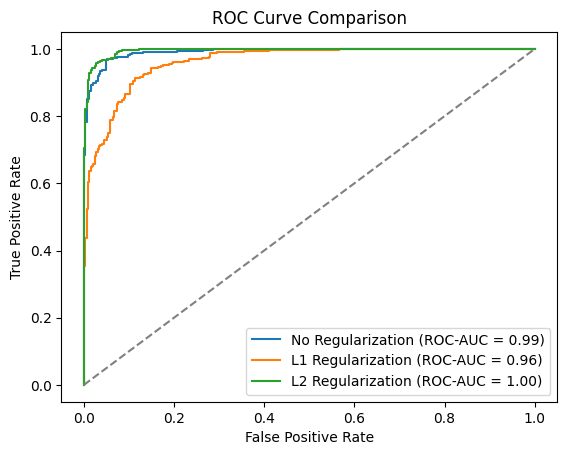

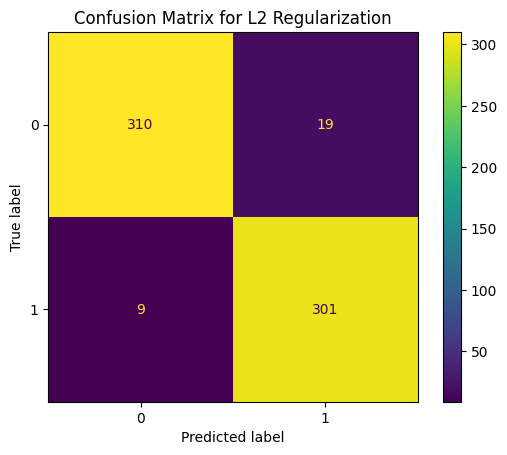


Feature Importance (Top 10):
      Feature  Importance
50  LND110210   -0.029089
28  HSD410213    0.002733
33  BZA010213   -0.002014
37  SBO001207   -0.000825
22  VET605213   -0.000807
1   PST045214   -0.000610
30  INC910213   -0.000537
4   POP010210    0.000419
24  HSG010214   -0.000404
2   PST040210    0.000392


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'county_facts.csv'  # Updated file path
df = pd.read_csv(file_path)

# Choose the last column as the target variable
target_column = df.columns[-1]  # This selects the last column as the target variable

# Split data into features (X) and target (y)
X = df.drop(columns=[target_column])  # Drop the chosen target column
y = df[target_column]  # Use the chosen target column as the target variable

# Convert the target to binary (0 or 1) based on a threshold (e.g., median)
y = (y > y.median()).astype(int)  # Converts continuous target to binary

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression without regularization (penalty=None)
model_no_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_no_reg.fit(X_train, y_train)
y_pred_no_reg = model_no_reg.predict(X_test)
y_pred_proba_no_reg = model_no_reg.predict_proba(X_test)[:, 1]

# Train and evaluate Logistic Regression with L1 and L2 regularization
# Using GridSearchCV to find the best 'C' for both L1 and L2
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search_l2 = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000), param_grid, cv=5, scoring='accuracy')

grid_search_l1.fit(X_train, y_train)
grid_search_l2.fit(X_train, y_train)

best_c_l1 = grid_search_l1.best_params_['C']
best_c_l2 = grid_search_l2.best_params_['C']

# Train models with the best C for L1 and L2 regularization
model_l1 = LogisticRegression(C=best_c_l1, penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
y_pred_proba_l1 = model_l1.predict_proba(X_test)[:, 1]

model_l2 = LogisticRegression(C=best_c_l2, penalty='l2', solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
y_pred_proba_l2 = model_l2.predict_proba(X_test)[:, 1]

# Evaluation metrics for each model
def print_metrics(y_test, y_pred, y_pred_proba, model_name):
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Print metrics for each model
print_metrics(y_test, y_pred_no_reg, y_pred_proba_no_reg, "No Regularization")
print_metrics(y_test, y_pred_l1, y_pred_proba_l1, "L1 Regularization")
print_metrics(y_test, y_pred_l2, y_pred_proba_l2, "L2 Regularization")

# Plot ROC curve for each model
fpr_no_reg, tpr_no_reg, _ = roc_curve(y_test, y_pred_proba_no_reg)
fpr_l1, tpr_l1, _ = roc_curve(y_test, y_pred_proba_l1)
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_pred_proba_l2)

plt.plot(fpr_no_reg, tpr_no_reg, label="No Regularization (ROC-AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_no_reg)))
plt.plot(fpr_l1, tpr_l1, label="L1 Regularization (ROC-AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_l1)))
plt.plot(fpr_l2, tpr_l2, label="L2 Regularization (ROC-AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_l2)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Plot confusion matrix for the best model based on ROC-AUC (select L2 regularization as an example)
ConfusionMatrixDisplay.from_estimator(model_l2, X_test, y_test)
plt.title("Confusion Matrix for L2 Regularization")
plt.show()

# Feature Importance (coefficients) analysis for the best model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_l2.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

print("\nFeature Importance (Top 10):")
print(feature_importance.head(10))
